In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("transaction_anomalies_dataset.csv")

In [2]:
df.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


In [3]:
# Check for null values
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64


In [4]:
# Check column info
print("\nColumn Info:")
print(df.info())


Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB
None


In [5]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501902   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.245225               

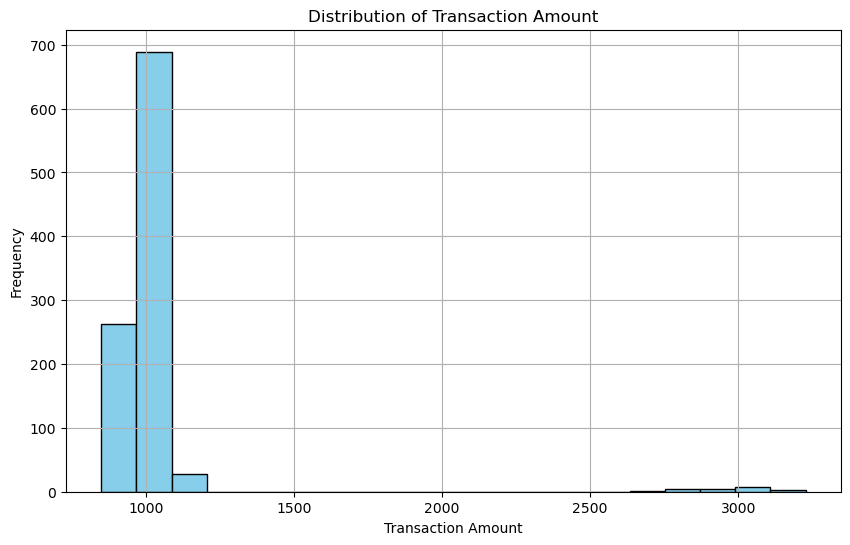

In [6]:
import matplotlib.pyplot as plt

# Plot distribution of transaction amount
plt.figure(figsize=(10, 6))
plt.hist(df['Transaction_Amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

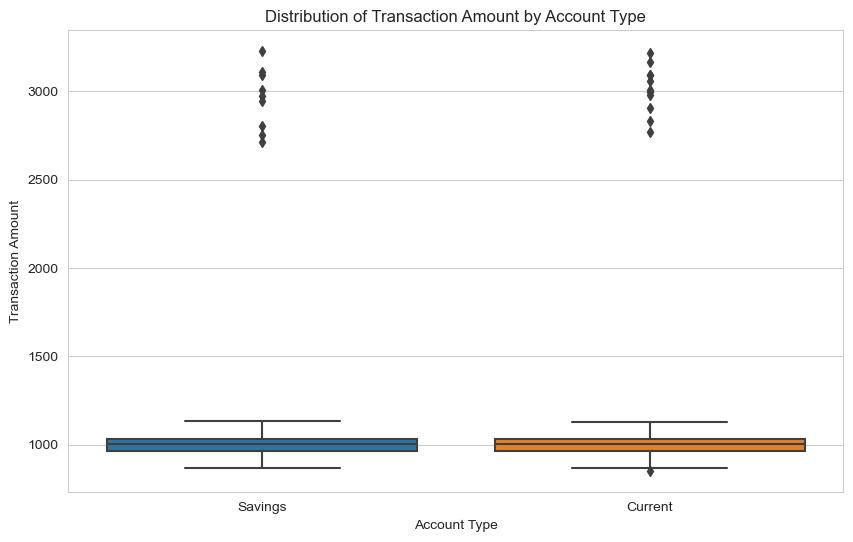

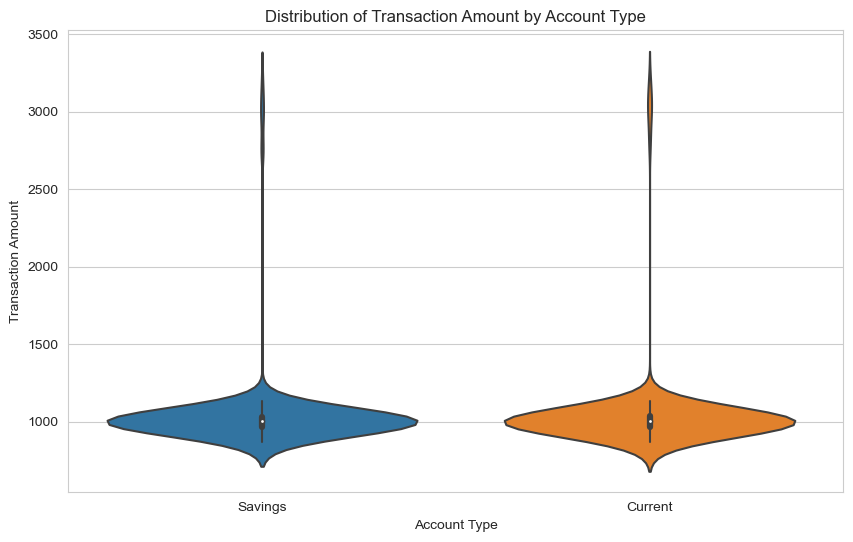

In [7]:
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Plot distribution of transaction amount by account type using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=df)
plt.title('Distribution of Transaction Amount by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.show()

# Alternatively, you can use a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Account_Type', y='Transaction_Amount', data=df)
plt.title('Distribution of Transaction Amount by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.show()

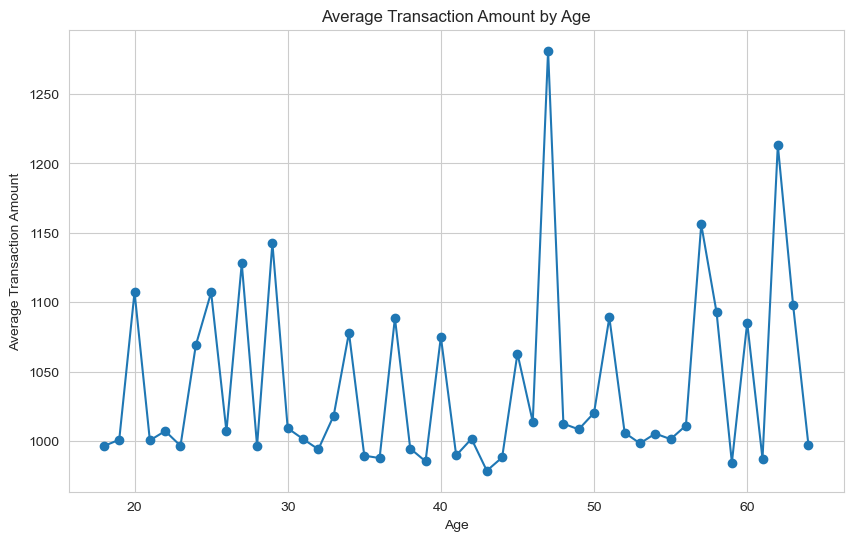

In [8]:
# Calculate the average transaction amount by age
average_transaction_by_age = df.groupby('Age')['Transaction_Amount'].mean().reset_index()

# Plot average transaction amount by age
plt.figure(figsize=(10, 6))
plt.plot(average_transaction_by_age['Age'], average_transaction_by_age['Transaction_Amount'], marker='o', linestyle='-')
plt.title('Average Transaction Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.grid(True)
plt.show()


In [9]:
print(df.columns)


Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Day_of_Week', 'Time_of_Day', 'Age',
       'Gender', 'Income', 'Account_Type'],
      dtype='object')


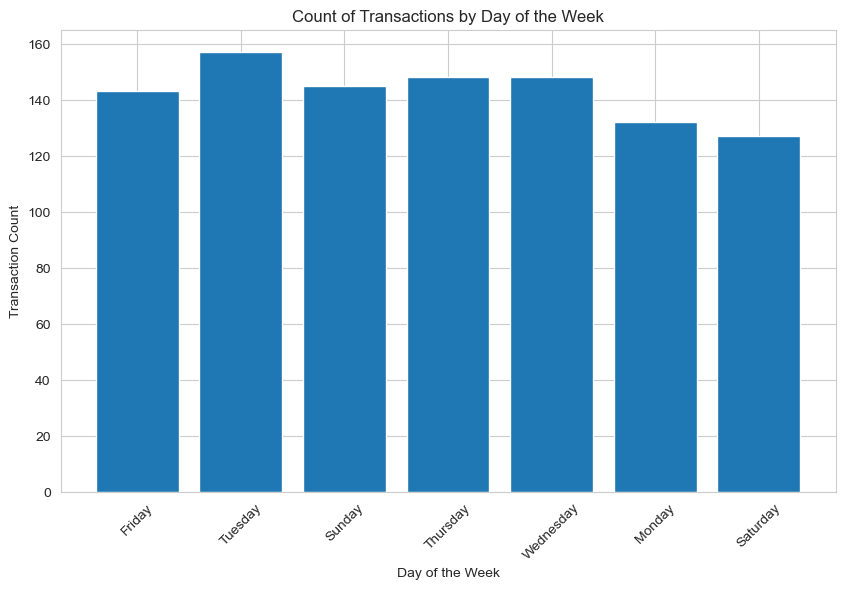

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the order of days of the week
days_order = ['Friday', 'Tuesday', 'Sunday', 'Thursday', 'Wednesday', 'Monday', 'Saturday']

# Assuming you have a DataFrame called df containing transaction data
# You need to calculate the count of transactions by day of the week
transactions_by_day = df['Day_of_Week'].value_counts().reindex(days_order)

# Plot count of transactions by day of the week using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(transactions_by_day.index, transactions_by_day.values)
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df containing your data
# First, let's encode the categorical variables
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5, annot=False)
plt.title('Correlation Matrix')
plt.show()
